In [3]:
images_path = "/content/drive/MyDrive/Food_101 - Dataset.zip"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from zipfile import ZipFile
with ZipFile(images_path, 'r') as z:
  z.extractall()

In [5]:

import collections
import io
import math
import os
import random
import glob
import numpy as np
import shutil
import pandas as pd

In [6]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

In [7]:
# def make_train_and_test_sets():
  # """Split the data into train and test sets and get the label classes."""
  # train_examples, test_examples = [], []
  # shuffler = random.Random(RANDOM_SEED)
  # is_root = True
data = "/content/Food_101"

training_dir = fr"/content/Train"
testing_dir = fr"/content/Testing"

if not os.path.exists(training_dir):
    os.mkdir(training_dir)

if not os.path.exists(testing_dir):
    os.mkdir(testing_dir)       
    
num_training_files = 0
num_testing_files = 0
    
    
for (dirname, subdirs, filenames) in os.walk(data):
    # print(subdirs)
    category_name = os.path.basename(dirname)
    print(category_name)
    if category_name == os.path.basename(data):
        continue
        
    training_data_category_dir = training_dir + '/' + category_name
    testing_data_category_dir = testing_dir + '/' + category_name
    if not os.path.exists(training_data_category_dir):
        os.mkdir(training_data_category_dir)   

    if not os.path.exists(testing_data_category_dir):
        os.mkdir(testing_data_category_dir)
        
    file_list = glob.glob(os.path.join(dirname,'*.jpg'))
    # print(len(file_list))
    random_set = np.random.permutation((file_list))
    print(len(random_set))
    
    training_ratio = 0.7
    k = round(len(random_set)*training_ratio)
    # print(k)
    
    train_list = random_set[:k]
    print(len(train_list))
    
    testing_ration = 0.3
    o = round(len(random_set)*testing_ration)
    # print(o)
    test_list = random_set[k:]
    print(len(test_list))
    
    
    for i in train_list : 
        shutil.copy(i, training_dir + '/' + category_name + '/' )
        num_training_files += 1

    for j in test_list : 
        shutil.copy(j, testing_dir + '/' + category_name + '/' )
        num_testing_files += 1
    
    print("Processed " + str(num_training_files) + " training files.")
    print("Processed " + str(num_testing_files) + " testing files.")

Food_101
chocolate_cake
1000
700
300
Processed 700 training files.
Processed 300 testing files.
tacos
1000
700
300
Processed 1400 training files.
Processed 600 testing files.
falafel
1000
700
300
Processed 2100 training files.
Processed 900 testing files.
pancakes
1000
700
300
Processed 2800 training files.
Processed 1200 testing files.
hot_dog
1000
700
300
Processed 3500 training files.
Processed 1500 testing files.
strawberry_shortcake
1000
700
300
Processed 4200 training files.
Processed 1800 testing files.
ice_cream
1000
700
300
Processed 4900 training files.
Processed 2100 testing files.
donuts
1000
700
300
Processed 5600 training files.
Processed 2400 testing files.
french_fries
1000
700
300
Processed 6300 training files.
Processed 2700 testing files.
pizza
1000
700
300
Processed 7000 training files.
Processed 3000 testing files.
ravioli
1000
700
300
Processed 7700 training files.
Processed 3300 testing files.
onion_rings
1000
700
300
Processed 8400 training files.
Processed 3600

In [8]:
import cv2

X=[]
y=[]

for i in os.listdir(training_dir):
    print(i)          
    for j in os.listdir(training_dir +"/" + i):
        # print(j)
        dummy = cv2.imread(training_dir +"/" +i + "/" + j)
        # print(dummy)
        dummy = cv2.resize(dummy, (128, 128))
        X.append(dummy)
        y.append(i)
        

chocolate_cake
tacos
falafel
pancakes
hot_dog
strawberry_shortcake
ice_cream
donuts
french_fries
pizza
ravioli
onion_rings
apple_pie
samosa
nachos
spring_rolls
waffles


[ 5923  4641  9387  6151  3803  5381 10535 11130 10414  7753  1399  3828
  1806  5356  5785  7114 11267   229  2795  6899]


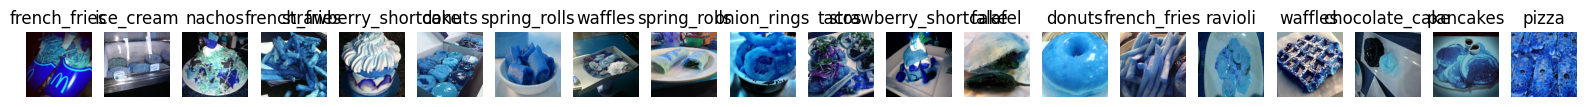

In [9]:
# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 20) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 15))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

In [10]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)
print(len(X_train))
print(len(X_val))

9103
2276


In [11]:
## One hot encode the target variable
y_train = pd.get_dummies(y_train).values
y_val = pd.get_dummies(y_val).values

## Convert data from list to array
X_train = np.array(X_train)
X_val = np.array(X_val)

In [12]:
## Normalization
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_train = X_train / 255

X_val = X_val.astype('float32')
X_val = X_val.reshape(X_val.shape[0], 128,128,3)
X_val = X_val / 255

In [13]:
## Check the min and max values after normalization
print('Train data------------','max:',X_train.max(), 'min:',X_train.min())
print('Validation data-------','max:',X_val.max(), 'min:',X_val.min())

Train data------------ max: 1.0 min: 0.0
Validation data------- max: 1.0 min: 0.0


In [14]:
# DATA SET SHAPE AND SIZE
print('\nTraining data : ', X_train.shape, y_train.shape)  # TRAIN
print('\nTesting data : ', X_val.shape, y_val.shape)       # Validation


Training data :  (9103, 128, 128, 3) (9103, 17)

Testing data :  (2276, 128, 128, 3) (2276, 17)


In [ ]:
##VGG16

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=(128,128,3),
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x) #dense layer 3
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(17, activation='softmax')(x) #final layer with sigmoid activation

model_vgg16 = Model(inputs=base_model.input, outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [16]:
vgg16_history = model_vgg16.fit(x=X_train, y=y_train, 
                                batch_size=64, 
                                epochs=50, 
                               validation_data=(X_val, y_val))

Epoch 1/50
143/143 [==============================] - 34s 133ms/step - loss: 2.9175 - accuracy: 0.1587 - val_loss: 2.1954 - val_accuracy: 0.3880
Epoch 2/50
143/143 [==============================] - 14s 101ms/step - loss: 2.3187 - accuracy: 0.2955 - val_loss: 1.8713 - val_accuracy: 0.4517
Epoch 3/50
143/143 [==============================] - 17s 119ms/step - loss: 2.0731 - accuracy: 0.3658 - val_loss: 1.7066 - val_accuracy: 0.4903
Epoch 4/50
143/143 [==============================] - 15s 105ms/step - loss: 1.9307 - accuracy: 0.4099 - val_loss: 1.6404 - val_accuracy: 0.5119
Epoch 5/50
143/143 [==============================] - 17s 122ms/step - loss: 1.8529 - accuracy: 0.4282 - val_loss: 1.6202 - val_accuracy: 0.5110
Epoch 6/50
143/143 [==============================] - 18s 125ms/step - loss: 1.7970 - accuracy: 0.4490 - val_loss: 1.5465 - val_accuracy: 0.5360
Epoch 7/50
143/143 [==============================] - 18s 124ms/step - loss: 1.7590 - accuracy: 0.4671 - val_loss: 1.5364 - val_ac

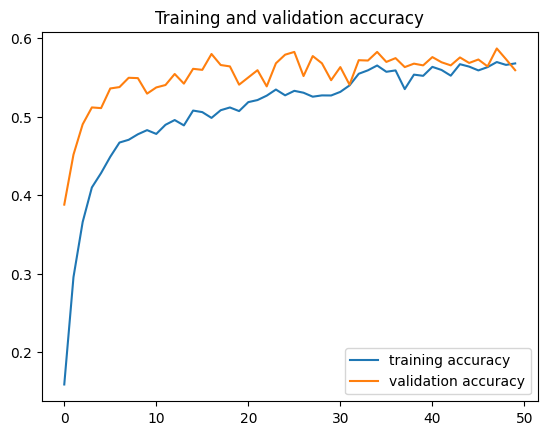

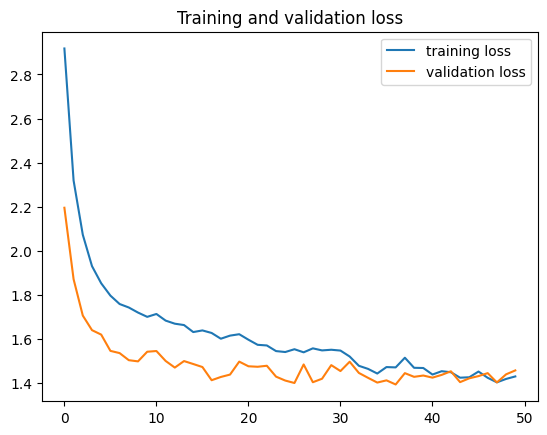

In [17]:
## Accuracy and Loss plots

accuracy = vgg16_history.history['accuracy']
val_accuracy = vgg16_history.history['val_accuracy']
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')
plt.show()

In [ ]:
###VGG19

In [18]:
X_train

array([[[[0.36078432, 0.5137255 , 0.76862746],
         [0.32941177, 0.53333336, 0.8       ],
         [0.38039216, 0.60784316, 0.8784314 ],
         ...,
         [0.        , 0.        , 0.00392157],
         [0.00392157, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157]],

        [[0.5137255 , 0.654902  , 0.8862745 ],
         [0.45882353, 0.63529414, 0.8784314 ],
         [0.4509804 , 0.6431373 , 0.8901961 ],
         ...,
         [0.        , 0.00392157, 0.02352941],
         [0.00784314, 0.00392157, 0.00392157],
         [0.01960784, 0.00784314, 0.        ]],

        [[0.5294118 , 0.65882355, 0.8666667 ],
         [0.49019608, 0.64705884, 0.84313726],
         [0.42352942, 0.58431375, 0.7921569 ],
         ...,
         [0.14901961, 0.1764706 , 0.23137255],
         [0.03529412, 0.04313726, 0.06666667],
         [0.01176471, 0.00392157, 0.00392157]],

        ...,

        [[0.5058824 , 0.7019608 , 0.78039217],
         [0.5058824 , 0.6901961 , 0.77254903]

In [19]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(17, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                            

In [20]:
vgg19_history = model_vgg19.fit(x=X_train, y=y_train, 
                              batch_size=64, 
                              epochs=50, 
                              validation_data=(X_val, y_val))

Epoch 1/50
143/143 [==============================] - 25s 140ms/step - loss: 2.8603 - accuracy: 0.1608 - val_loss: 2.3469 - val_accuracy: 0.2540
Epoch 2/50
143/143 [==============================] - 21s 147ms/step - loss: 2.2014 - accuracy: 0.3148 - val_loss: 2.1806 - val_accuracy: 0.3418
Epoch 3/50
143/143 [==============================] - 20s 143ms/step - loss: 1.8585 - accuracy: 0.4278 - val_loss: 1.6410 - val_accuracy: 0.4947
Epoch 4/50
143/143 [==============================] - 19s 131ms/step - loss: 1.6048 - accuracy: 0.5092 - val_loss: 1.7003 - val_accuracy: 0.4934
Epoch 5/50
143/143 [==============================] - 20s 143ms/step - loss: 1.4294 - accuracy: 0.5657 - val_loss: 1.4923 - val_accuracy: 0.5554
Epoch 6/50
143/143 [==============================] - 21s 144ms/step - loss: 1.3005 - accuracy: 0.6116 - val_loss: 1.4713 - val_accuracy: 0.5721
Epoch 7/50
143/143 [==============================] - 19s 133ms/step - loss: 1.1473 - accuracy: 0.6519 - val_loss: 1.4495 - val_ac

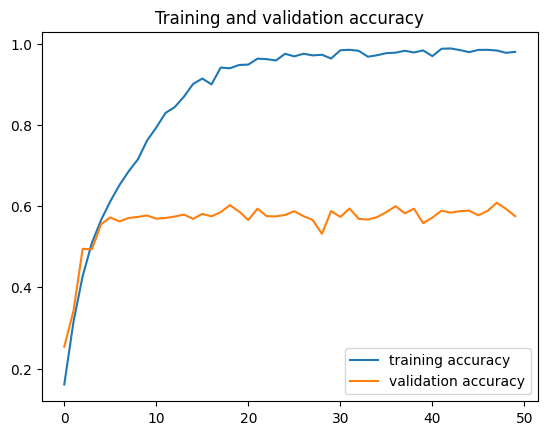

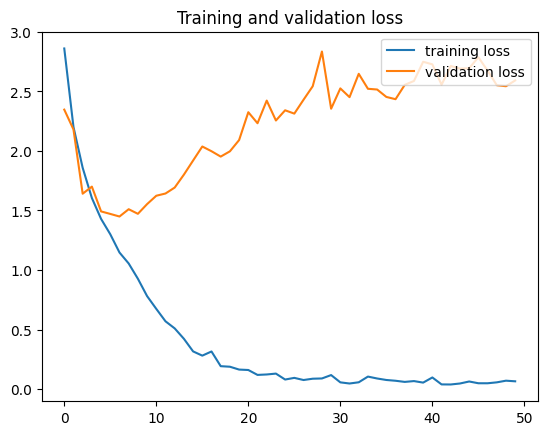

In [21]:
## Accuracy and Loss plots

accuracy = vgg19_history.history['accuracy']
val_accuracy = vgg19_history.history['val_accuracy']
loss = vgg19_history.history['loss']
val_loss = vgg19_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [ ]:
###Resnet

In [22]:
import tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=(128, 128 ,3),
                      weights='imagenet',
                      include_top=False) #imports the ResNet50 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x) 
x = Dense(128, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds = Dense(17, activation='softmax')(x) 

model_resnet50 = Model(inputs=base_model.input, outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_resnet50.layers[:150]:
    layer.trainable=False
for layer in model_resnet50.layers[150:]:
    layer.trainable=True

# Compile the model
model_resnet50.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_resnet50.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizati

In [23]:
resent50_history = model_resnet50.fit(x=X_train, y=y_train, 
                                     batch_size=64, 
                                     epochs=50, 
                                     validation_data=(X_val, y_val))

Epoch 1/50
143/143 [==============================] - 29s 126ms/step - loss: 3.6077 - accuracy: 0.0780 - val_loss: 2.8819 - val_accuracy: 0.0584
Epoch 2/50
143/143 [==============================] - 15s 102ms/step - loss: 3.1078 - accuracy: 0.1290 - val_loss: 2.8290 - val_accuracy: 0.0879
Epoch 3/50
143/143 [==============================] - 15s 102ms/step - loss: 2.8877 - accuracy: 0.1587 - val_loss: 2.7503 - val_accuracy: 0.1467
Epoch 4/50
143/143 [==============================] - 14s 101ms/step - loss: 2.7038 - accuracy: 0.1895 - val_loss: 2.7449 - val_accuracy: 0.1481
Epoch 5/50
143/143 [==============================] - 14s 100ms/step - loss: 2.5821 - accuracy: 0.2151 - val_loss: 2.7630 - val_accuracy: 0.1542
Epoch 6/50
143/143 [==============================] - 15s 103ms/step - loss: 2.4562 - accuracy: 0.2477 - val_loss: 2.7539 - val_accuracy: 0.1604
Epoch 7/50
143/143 [==============================] - 14s 101ms/step - loss: 2.3504 - accuracy: 0.2706 - val_loss: 2.7353 - val_ac

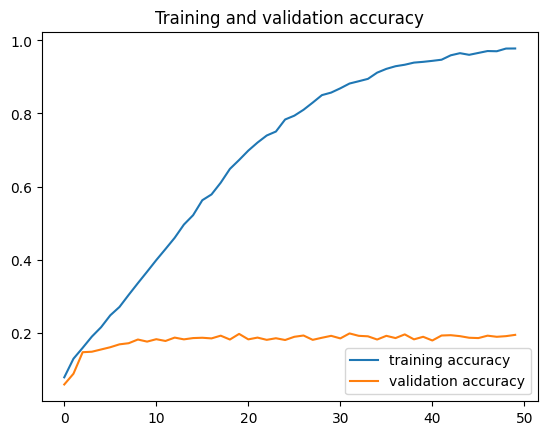

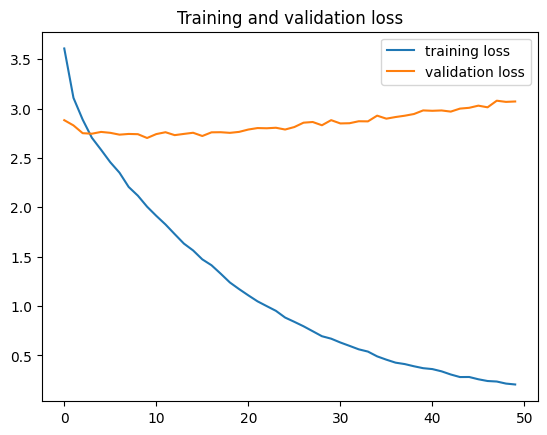

In [24]:
## Accuracy and Loss plots

accuracy = resent50_history.history['accuracy']
val_accuracy = resent50_history.history['val_accuracy']
loss = resent50_history.history['loss']
val_loss = resent50_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')
plt.show()

In [ ]:
### Mobile Net

In [25]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNet(input_shape=(128,128,3),
                       weights='imagenet',
                       include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512,activation='relu')(x) #dense layer 2
x = Dense(256,activation='relu')(x) #dense layer 3
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds = Dense(17,activation='softmax')(x) #final layer with softmax activation

model_mobilenet = Model(inputs=base_model.input,
                        outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_mobilenet.layers[:20]:
    layer.trainable=False
for layer in model_mobilenet.layers[20:]:
    layer.trainable=True

# Compile the model
model_mobilenet.compile(optimizer='Adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_mobilenet.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128  

In [26]:
# Model with the non-trainable first 20 layers 

mobilenet_history = model_mobilenet.fit(x=X_train, y=y_train, 
                                          batch_size=64, 
                                          epochs=100, 
                                          validation_data=(X_val, y_val))

Epoch 1/100
143/143 [==============================] - 28s 84ms/step - loss: 2.1672 - accuracy: 0.4065 - val_loss: 2.0497 - val_accuracy: 0.5149
Epoch 2/100
143/143 [==============================] - 10s 71ms/step - loss: 1.1366 - accuracy: 0.6685 - val_loss: 3.1559 - val_accuracy: 0.4416
Epoch 3/100
143/143 [==============================] - 10s 72ms/step - loss: 0.7914 - accuracy: 0.7652 - val_loss: 2.0422 - val_accuracy: 0.5510
Epoch 4/100
143/143 [==============================] - 10s 70ms/step - loss: 0.5973 - accuracy: 0.8212 - val_loss: 1.6348 - val_accuracy: 0.6138
Epoch 5/100
143/143 [==============================] - 10s 68ms/step - loss: 0.4578 - accuracy: 0.8628 - val_loss: 2.6117 - val_accuracy: 0.4899
Epoch 6/100
143/143 [==============================] - 10s 68ms/step - loss: 0.3752 - accuracy: 0.8863 - val_loss: 1.6019 - val_accuracy: 0.6072
Epoch 7/100
143/143 [==============================] - 10s 71ms/step - loss: 0.3754 - accuracy: 0.8869 - val_loss: 1.5987 - val_ac

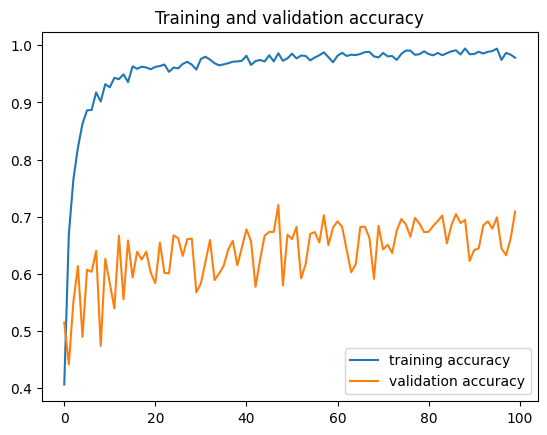

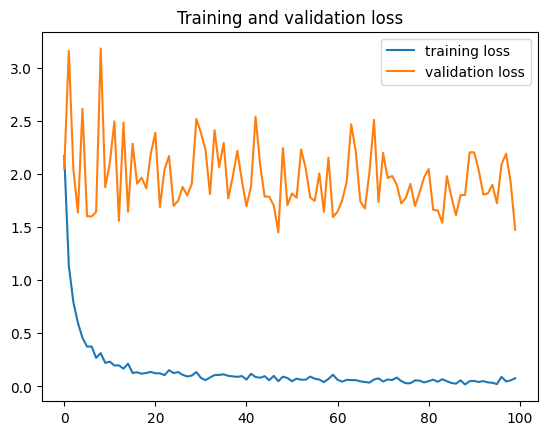

In [27]:
## Accuracy and Loss plots

accuracy = mobilenet_history.history['accuracy']
val_accuracy = mobilenet_history.history['val_accuracy']
loss = mobilenet_history.history['loss']
val_loss = mobilenet_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')
plt.show()